In [102]:
import json
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from scipy import stats

In [5]:
PATH_TO_HUMAN_COUNTS = "../data/signatures/GRCh37_codon_counts.json"
PATH_TO_SIGNATURES = "../data/external/reference_sig_GRCh37/COSMIC_v3.2_SBS_GRCh37.txt"
PATH_TO_SIGNATURES_NORMALIZED = "../data/signatures/COSMIC_v3.2_SBS_GRCh37_normalized.txt"

In [81]:
def load_triplet_counts(path: str):
    """ read and collapse raw trinucleotide counts """
    with open(path) as fin:
        counts = json.load(fin)

    new_counts = defaultdict(int)
    for trinuc, num in counts.items():
        standart_trinuc = trinuc.upper()
        if len(set(standart_trinuc).difference("ATGC")) == 0:
            new_counts[standart_trinuc] += num
    return new_counts


In [84]:
triplet_counts = pd.Series(load_triplet_counts(PATH_TO_HUMAN_COUNTS))
signatures = pd.read_csv(PATH_TO_SIGNATURES, sep="\t", index_col=0)
signatures_norm = pd.read_csv(PATH_TO_SIGNATURES_NORMALIZED, sep="\t", index_col=0)

In [91]:
triplet_counts.head(5)

TAA    61780796
AAC    43438625
ACC    34902100
CCC    39661785
CCT    53384677
dtype: int64

In [67]:
signatures.head(3)

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS85,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.000886,5.800168e-07,0.020808,0.042196,0.011998,0.000425,0.000067,0.002329,0.004830,0.000040,...,0.006080,0.002954,0.008973,0.0,0.032169,0.002202,0.002945,0.011329,0.011573,0.015580
A[C>A]C,0.002280,1.480043e-04,0.016507,0.033297,0.009438,0.000524,0.000179,0.000461,0.001150,0.000765,...,0.000880,0.003775,0.004573,0.0,0.017694,0.000708,0.052997,0.009745,0.008096,0.024746
A[C>A]G,0.000177,5.230151e-05,0.001751,0.015599,0.001850,0.000052,0.000071,0.000186,0.000377,0.000250,...,0.000306,0.000385,0.006209,0.0,0.009671,0.000139,0.000204,0.004697,0.001761,0.001574


In [68]:
signatures_norm.head(2)

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS85,SBS86,SBS87,SBS88,SBS89,SBS90,SBS91,SBS92,SBS93,SBS94
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.000805,5.269032e-07,0.018903,0.038332,0.010899,0.000386,0.000061,0.002116,0.004388,0.000037,...,0.005523,0.002684,0.008151,0.0,0.029223,0.002000,0.002675,0.010292,0.010513,0.014153
A[C>A]C,0.002875,1.865811e-04,0.020809,0.041976,0.011898,0.000661,0.000226,0.000581,0.001450,0.000964,...,0.001109,0.004758,0.005764,0.0,0.022306,0.000893,0.066811,0.012285,0.010207,0.031196


## Trinucleotide frequencies distribution

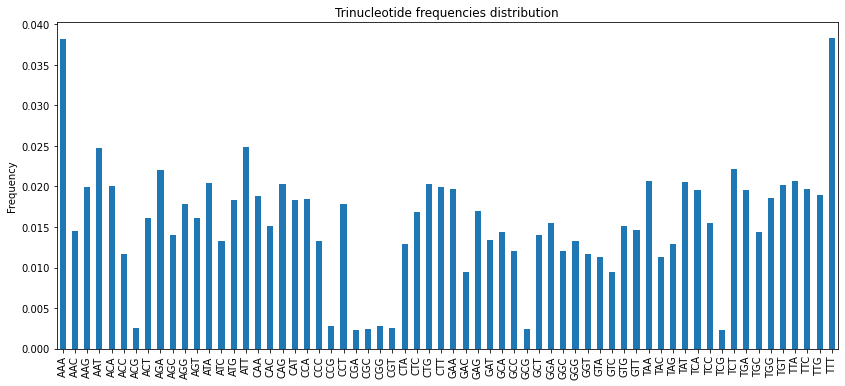

In [144]:
plt.figure(figsize=(14, 6))
(triplet_counts / triplet_counts.sum()).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Trinucleotide frequencies distribution")
plt.show()

**Result**: Distribution is somewhere uniform, but there are a lot of imbalances. Therefore normalization is required

## Difference between default and normalized signatures.
(COSMIC signatures was normalized to GRCh37 trinucleotide frequency)

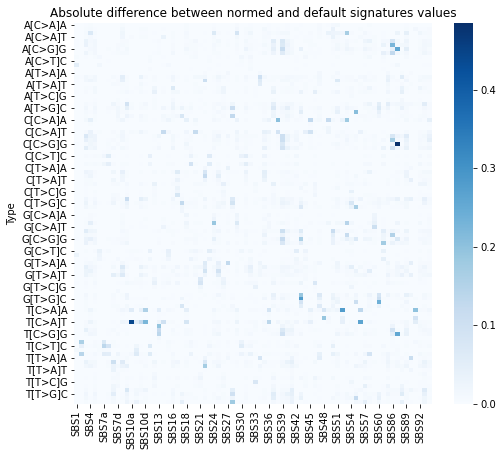

In [75]:
plt.figure(figsize=(8, 7))
sns.heatmap((signatures - signatures_norm).abs(), cmap="Blues")
plt.title("Absolute difference between normed and default signatures values")
plt.show()

In [57]:
dist = dict()
for sbs in signatures.columns:
    u, v = signatures[sbs], signatures_norm[sbs]
    d = cosine(u, v)
    dist[sbs] = d

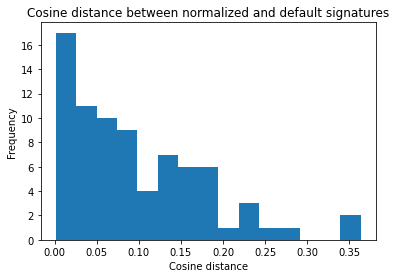

In [74]:
pd.Series(dist).plot.hist(bins=15)
plt.title("Cosine distance between normalized and default signatures")
plt.xlabel("Cosine distance")
plt.show()

**Result**: there are strong difference --> normalization have effect 